In [1]:
!pip install matplotlib


In [2]:
!pip install scikit-learn


# GaussianMixtureModel

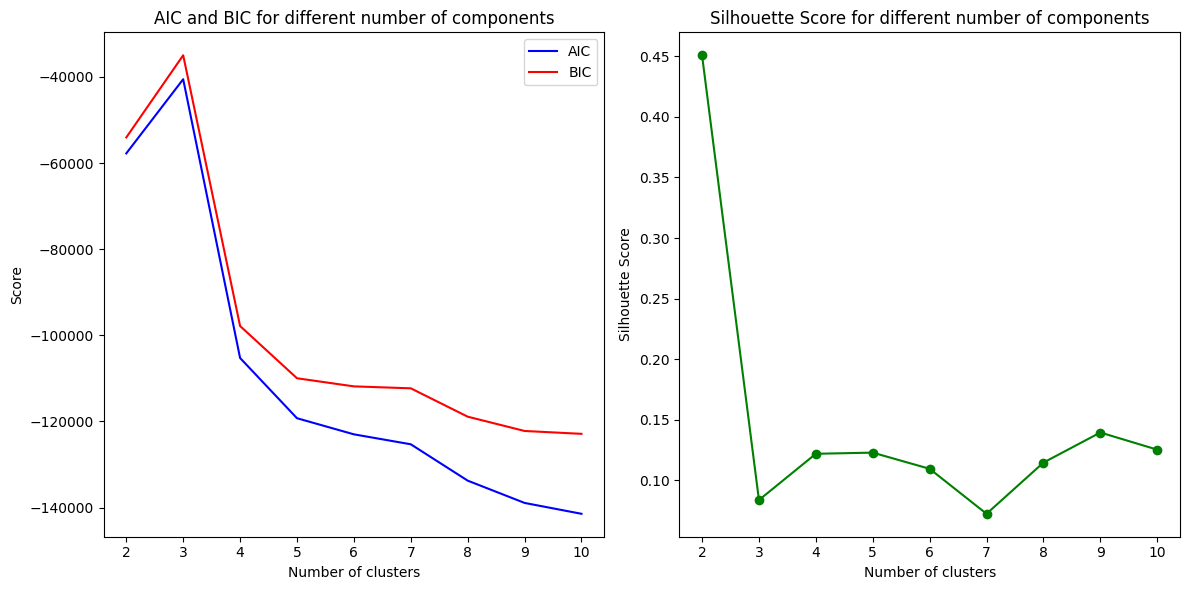

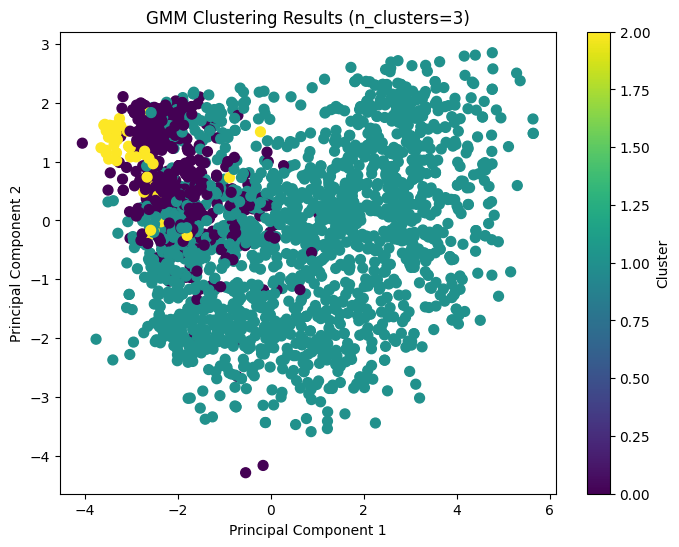

Silhouette Score: 0.0837265649289182


,Income,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,MntFishProducts,NumWebVisitsMonth,Complain,Z_CostContact,...,Education_PhD,Marital_Status_Alone,Marital_Status_Married,Marital_Status_Widow,Marital_Status_YOLO,Age,Tenure,Total_campaigns,Purchase_frequency,Cluster
0,0.299651,0.0,0.0,0.307039,1.005751,2.210169,2.190303,0.724452,0.0,3.0,...,0,0,0,0,0,1.007064,1.531185,-0.439037,1.380023,1
1,-0.263808,1.0,1.0,-0.383664,-0.879539,-0.810358,-0.746320,-0.127397,0.0,3.0,...,0,0,0,0,0,1.261969,-1.190545,-0.439037,-1.163336,0
2,0.943420,0.0,0.0,-0.798086,0.374300,-0.133536,1.954878,-0.553322,0.0,3.0,...,0,0,0,0,0,0.327318,-0.205773,-0.439037,0.844579,1
3,-1.204881,1.0,0.0,-0.798086,-0.879539,-0.732048,-0.548067,0.298528,0.0,3.0,...,0,0,0,0,0,-1.287080,-1.061881,-0.439037,-0.895614,0
4,0.307056,1.0,0.0,1.550305,-0.390089,-0.183879,0.344072,-0.127397,0.0,3.0,...,1,0,1,0,0,-1.032175,-0.953012,-0.439037,0.576857,1


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = '../data/marketing_campaign_final.csv'
df = pd.read_csv(file_path)

# Drop non-numeric columns (if any) and columns that don't contribute to clustering
df_clean = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Find the optimal number of clusters using AIC and BIC
aic_scores = []
bic_scores = []
sil_scores = []
n_components_range = range(2, 11)  # Test for cluster sizes between 2 and 10

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    aic_scores.append(gmm.aic(X_scaled))
    bic_scores.append(gmm.bic(X_scaled))
    
    # Calculate silhouette score for each clustering
    labels = gmm.predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot AIC, BIC, and Silhouette Score to determine optimal clusters
plt.figure(figsize=(12, 6))

# AIC and BIC Plot
plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic_scores, label='AIC', color='blue')
plt.plot(n_components_range, bic_scores, label='BIC', color='red')
plt.title('AIC and BIC for different number of components')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(n_components_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score for different number of components')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on AIC, BIC, and silhouette score
optimal_clusters = 3  # Based on the previous visual analysis, choose the optimal number
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm.fit(X_scaled)

# Predict the cluster labels
labels = gmm.predict(X_scaled)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title(f'GMM Clustering Results (n_clusters={optimal_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Calculate silhouette score for the chosen clusters
sil_score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {sil_score}')

# Add cluster labels to the original dataframe for inspection
df['Cluster'] = labels

# Show the first few rows of the dataframe with cluster labels
df.head()


# DBSCAN

Best DBSCAN Silhouette Score: 0.501386842095861
Best DBSCAN eps: 0.2, min_samples: 5


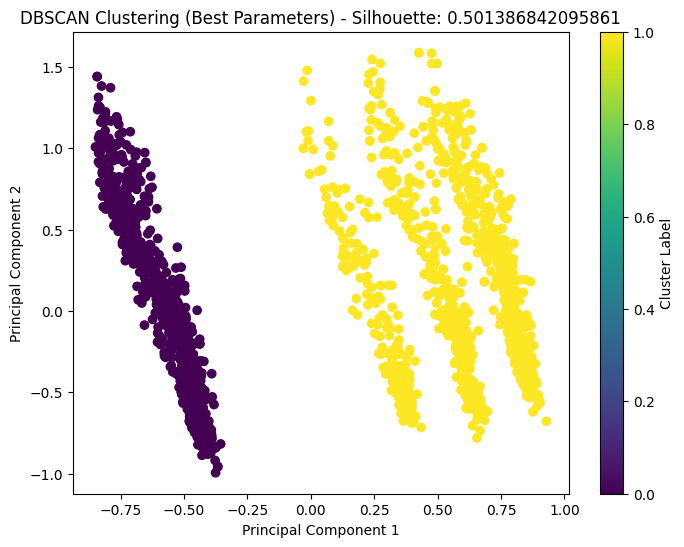

Agglomerative Clustering Silhouette Score: 0.5227078247273018


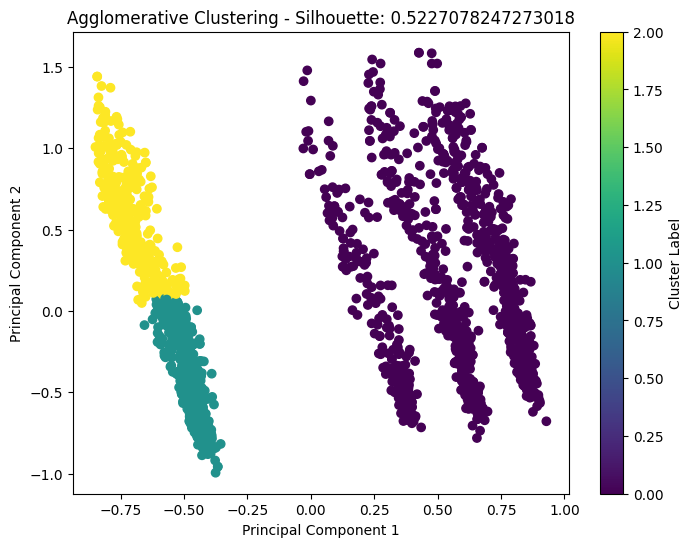

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../data/marketing_campaign_final.csv'  # Update this with the actual path
data = pd.read_csv(file_path)

# Preprocessing: Select numeric columns for clustering
features = data.select_dtypes(include=['float64', 'int64']).columns

# Apply MinMaxScaler for feature scaling
scaler = MinMaxScaler()
scaled_data_minmax = scaler.fit_transform(data[features])

# Apply PCA for dimensionality reduction (Let's reduce to 2 components for visualization and better clustering)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data_minmax)

# Try different DBSCAN parameters (eps and min_samples)
eps_values = np.linspace(0.1, 1.0, 10)  # Varying eps from 0.1 to 1.0
min_samples_values = [5, 10, 15, 20]  # Varying min_samples

best_dbscan_score = -1
best_dbscan_labels = None
best_eps = None
best_min_samples = None

# Fine-tuning DBSCAN
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(reduced_data)
        
        # Silhouette score (skip if there is only one cluster or noise points)
        if len(set(dbscan_labels)) > 1:
            sil_score = silhouette_score(reduced_data, dbscan_labels)
            if sil_score > best_dbscan_score:
                best_dbscan_score = sil_score
                best_dbscan_labels = dbscan_labels
                best_eps = eps
                best_min_samples = min_samples

# Print best DBSCAN results
print(f"Best DBSCAN Silhouette Score: {best_dbscan_score}")
print(f"Best DBSCAN eps: {best_eps}, min_samples: {best_min_samples}")

# Visualizing DBSCAN with the best parameters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=best_dbscan_labels, cmap='viridis', marker='o')
plt.title(f"DBSCAN Clustering (Best Parameters) - Silhouette: {best_dbscan_score}")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Now, let's try Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Set n_clusters based on your analysis
agg_labels = agg_clustering.fit_predict(reduced_data)

# Calculate Silhouette Score for Agglomerative Clustering
agg_sil_score = silhouette_score(reduced_data, agg_labels)

print(f"Agglomerative Clustering Silhouette Score: {agg_sil_score}")

# Visualizing Agglomerative Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=agg_labels, cmap='viridis', marker='o')
plt.title(f"Agglomerative Clustering - Silhouette: {agg_sil_score}")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


# Hierarchical Clustering:

Successfully trained and predicted on scaled data
Silhouette Score for hierarchical clustering:
0.20


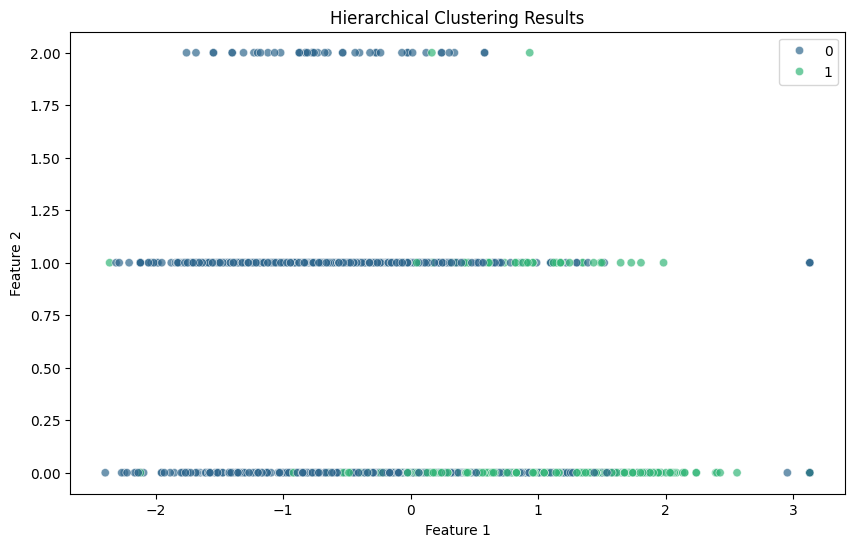

Cluster Labels successfully added


,Income,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,MntFishProducts,NumWebVisitsMonth,Complain,Z_CostContact,...,Marital_Status_Alone,Marital_Status_Married,Marital_Status_Widow,Marital_Status_YOLO,Age,Tenure,Total_campaigns,Purchase_frequency,Cluster,Hierarchical_Cluster
0,0.299651,0.0,0.0,0.307039,1.005751,2.210169,2.190303,0.724452,0.0,3.0,...,0,0,0,0,1.007064,1.531185,-0.439037,1.380023,1,1
1,-0.263808,1.0,1.0,-0.383664,-0.879539,-0.810358,-0.746320,-0.127397,0.0,3.0,...,0,0,0,0,1.261969,-1.190545,-0.439037,-1.163336,0,0
2,0.943420,0.0,0.0,-0.798086,0.374300,-0.133536,1.954878,-0.553322,0.0,3.0,...,0,0,0,0,0.327318,-0.205773,-0.439037,0.844579,1,1
3,-1.204881,1.0,0.0,-0.798086,-0.879539,-0.732048,-0.548067,0.298528,0.0,3.0,...,0,0,0,0,-1.287080,-1.061881,-0.439037,-0.895614,0,0
4,0.307056,1.0,0.0,1.550305,-0.390089,-0.183879,0.344072,-0.127397,0.0,3.0,...,0,1,0,0,-1.032175,-0.953012,-0.439037,0.576857,1,0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Load the dataset
file_path = '../data/marketing_campaign_final.csv'
df_scaled = pd.read_csv(file_path)                         # Loaded the clean & scaled dataset


# Initialize the clustering algorithm:
hc = AgglomerativeClustering(n_clusters=2,                 # Number of clusters - 2
                             metric='euclidean',         # Measures straight line distance (most common)
                             linkage='ward')               # Minimizes the variance within clusters (works best with euclidean)

# Train (fit) and predict using Hierarchical clustering algorithm:
hc_labels = hc.fit_predict(X_scaled)

print("Successfully trained and predicted on scaled data")

# Calculate the error metric (Evaluation) using silhouette score:
sc = silhouette_score(df_scaled, hc_labels)                          # Evaluation of hierarchical clustering
print(f"Silhouette Score for hierarchical clustering:\n{sc:.2f}")

# Plot the clusters:
plt.figure(figsize=(10,6))                        # Configure plot size
sns.scatterplot(x=df_scaled.iloc[:, 0],             # First feature of the data
                 y=df_scaled.iloc[:, 1],            # Second feature of the data
                 hue=hc_labels, palette='viridis',
                 alpha=0.7)
plt.title("Hierarchical Clustering Results")      # Plot title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")                           # X and Y axis labels
plt.show()                                        # Display the plot

# Add cluster labels to df (original dataframe) for better understanding:
df['Hierarchical_Cluster'] = hc_labels
print('Cluster Labels successfully added')

# Preview the data:
df.head()

In [6]:
# Set display option to maximum for better viewing:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Identifying Hierarchical cluster within the data:
df.groupby('Hierarchical_Cluster').mean().round(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,MntFishProducts,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Married,Marital_Status_Widow,Marital_Status_YOLO,Age,Tenure,Total_campaigns,Purchase_frequency,Cluster
Hierarchical_Cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.42,0.62,0.54,0.0,-0.39,-0.45,-0.43,0.28,0.01,3.0,11.0,0.10,0.04,0.42,0.19,0.26,0.0,0.38,0.05,0.0,-0.02,-0.1,-0.23,-0.41,0.70
1,0.87,0.08,0.44,-0.0,0.80,0.92,0.87,-0.58,0.00,3.0,11.0,0.25,0.00,0.66,0.11,0.12,0.0,0.40,0.00,0.0,0.05,0.2,0.47,0.84,0.98


## Insights:
### Cluster distribution:
  - Two clusters were formed : 0,1.
  - Cluster 0 seems to have a lower income and spending group, while Cluster 1 has higher values.

### Cross-Check with DBSCAN Clustering:
  - Both clusters have a DBSCAN cluster value of -1, meaning that DBSCAN might have classified them as noise/anomalies.
  - This suggests hierarchical clustering was better at capturing the structure in the data compared to DBSCAN.

### Final thoughts:
  - Hierarchical Clustering effectively distinguised high spending vs low spending customers.
  - The higher income group makes purchases more frequently, while lower income group spends more time browsing.

### Evaluation and improvements:
  - Model resulted in a silhouette score of 0.20 which is quite low, indicating clusters are not that well separated.
  - Apply PCA for dimensional reduction and re-train the model on PCA data.
  - Tuning the parameters with more number of clusters and alternate linkage method might provide better separation/segmentation.
  - Can compare the results between alternate linkage as well.
  ---

# K-Means Clustering:

Successfully predicted the values using KMeans Algorithm
Silhouette Score for KMeans Clustering:
0.18


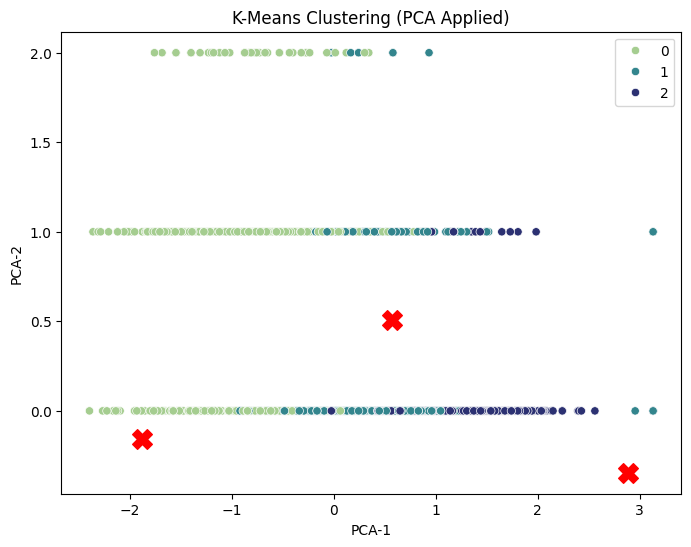

Cluster labels added


,Income,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,MntFishProducts,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Married,Marital_Status_Widow,Marital_Status_YOLO,Age,Tenure,Total_campaigns,Purchase_frequency,Cluster,Hierarchical_Cluster,K-Means_Cluster
0,0.299651,0.0,0.0,0.307039,1.005751,2.210169,2.190303,0.724452,0.0,3.0,11.0,1.0,0,1,0,0,0,0,0,0,1.007064,1.531185,-0.439037,1.380023,1,1,2
1,-0.263808,1.0,1.0,-0.383664,-0.879539,-0.810358,-0.746320,-0.127397,0.0,3.0,11.0,0.0,0,1,0,0,0,0,0,0,1.261969,-1.190545,-0.439037,-1.163336,0,0,0
2,0.943420,0.0,0.0,-0.798086,0.374300,-0.133536,1.954878,-0.553322,0.0,3.0,11.0,0.0,0,1,0,0,0,0,0,0,0.327318,-0.205773,-0.439037,0.844579,1,1,2
3,-1.204881,1.0,0.0,-0.798086,-0.879539,-0.732048,-0.548067,0.298528,0.0,3.0,11.0,0.0,0,1,0,0,0,0,0,0,-1.287080,-1.061881,-0.439037,-0.895614,0,0,0
4,0.307056,1.0,0.0,1.550305,-0.390089,-0.183879,0.344072,-0.127397,0.0,3.0,11.0,0.0,0,0,0,1,0,1,0,0,-1.032175,-0.953012,-0.439037,0.576857,1,0,1


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Dataset is already loaded as df_scaled:
df_scaled.head(5)

# Initialize the KMeans cluster model:
Kmeans = KMeans(n_clusters=3,                   # Selecting K=3
                random_state=42)

# Train(fit) and predict the values:
k_labels = Kmeans.fit_predict(df_scaled)
print('Successfully predicted the values using KMeans Algorithm')

# Evaluate the model using silhouette score:
sc = silhouette_score(df_scaled, k_labels)       # Calculate the score
print(f"Silhouette Score for KMeans Clustering:\n{sc:.2f}")

# Perform PCA to visualize 2D plot:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))                         # Adjust plot size
sns.scatterplot(x=df_scaled.iloc[:,0],
                y=df_scaled.iloc[:,1],
                hue=k_labels,
                palette='crest')                  # Plot scatterplot visual with first two features
plt.scatter(pca.transform(Kmeans.cluster_centers_)[:, 0], pca.transform(Kmeans.cluster_centers_)[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (PCA Applied)')
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.show()

# Add Cluster labels to original DataFrame (df):
df['K-Means_Cluster'] = k_labels
print('Cluster labels added')

# Preview the Data:
df.head()

In [8]:
# Identifying K-means clusters within the data:
df.groupby('K-Means_Cluster').mean().round(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,MntFishProducts,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Married,Marital_Status_Widow,Marital_Status_YOLO,Age,Tenure,Total_campaigns,Purchase_frequency,Cluster,Hierarchical_Cluster
K-Means_Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.85,0.80,0.44,0.02,-0.79,-0.71,-0.62,0.50,0.01,3.0,11.0,0.09,0.05,0.49,0.16,0.19,0.0,0.39,0.02,0.0,-0.27,-0.15,-0.31,-0.91,0.57,0.01
1,0.33,0.23,0.87,-0.04,0.43,-0.08,-0.06,0.12,0.01,3.0,11.0,0.13,0.00,0.47,0.18,0.28,0.0,0.40,0.04,0.0,0.39,0.27,-0.09,0.76,0.96,0.41
2,1.21,0.04,0.17,0.02,0.97,1.46,1.28,-1.11,0.01,3.0,11.0,0.29,0.00,0.57,0.16,0.20,0.0,0.36,0.04,0.0,0.02,-0.05,0.72,0.78,1.00,0.83


## Insights:
### Cluster distribution:
  - Three clusters were formed : 0,1,2.
  - Cluster 0 : consists of customers with moderate income and spending patterns.
  - Cluster 1 : consists of customers with lower income and spending levels.
  - Cluster 2 : consists of customers with higher income and spending habits, indicating frequent buyers.

### Cross-Check with DBSCAN Clustering:
  - DBSCAN cluster classified most of the datapoints as -1 indicating it as noise/anomalies.
  - However; it might be unable to capture a meaningful structure, while K-Means formed some distinguishable clusters.

### Final Thoughts:
  - Cluster 2 (higher income group) tends to make frequent purchases, while Cluster 1 (lower income) spends more time browsing and may have fewer purchases.

### Evaluation and Improvements:
  - The Silhouette Score is 0.18, indicating poor cluster separation.
  - Applying PCA for dimensionality reduction before clustering may improve results.
  - Tuning K (number of clusters) could enhance segmentation; trying values K=4 or K=5 may help.
  - Feature engineering (e.g., creating new features like purchase-to-income ratio, loyalty score) might improve cluster quality.
  ---

### Determine the Optimal Number of Clusters for Different Clustering Algorithms

## To determine the optimal number of clusters, we will perform Elbow Method, Silhouette Score, Davies-Bouldin Index for the following clustering algorithms:
##### K-Means
##### Hierarchical Clustering
##### DBSCAN
##### Gaussian Mixture Model (GMM)

# Hierarchical Clustering
#### Hierarchical clustering does not require specifying the number of clusters upfront. Instead, use a Dendrogram to determine the optimal number of clusters.

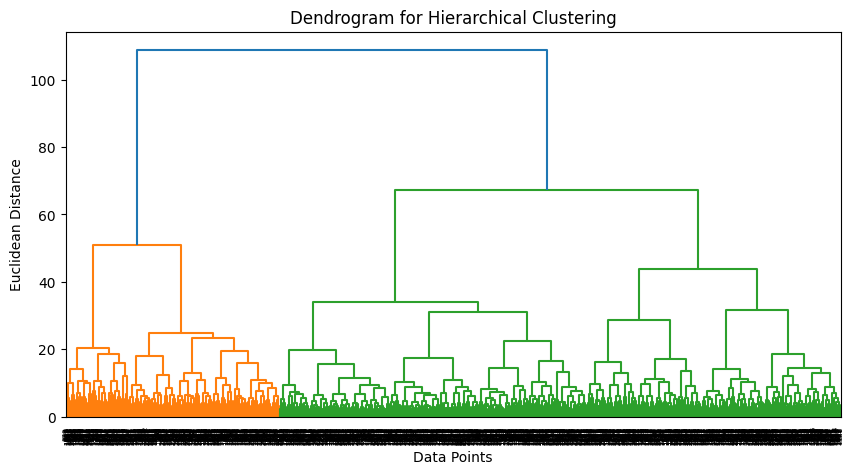

In [9]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

### Silhouette Score for Hierarchical Clustering

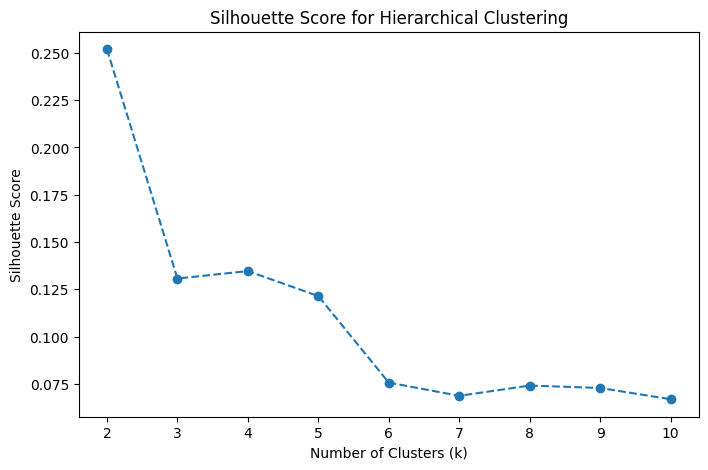

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=k)
    labels = hc.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.show()

 ### Davies-Bouldin Index for Hierarchical Clustering

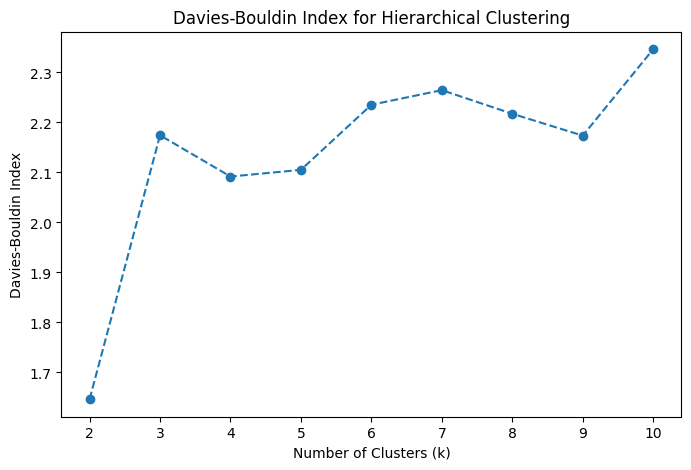

In [11]:
from sklearn.metrics import davies_bouldin_score

db_scores = []

for k in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=k)
    labels = hc.fit_predict(df_scaled)
    db_scores.append(davies_bouldin_score(df_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), db_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Hierarchical Clustering')
plt.show()

## Key Insight 
### Dendrogram Analysis suggests 2 or 3 clusters as optimal based on the longest linkage distance.

### Silhouette Score is highest at k=2, indicating the best cluster separation at this value.

### Davies-Bouldin Index is lowest at k=2, confirming that two clusters provide the best compactness and separation.

### Conclusion: k=2 is the optimal choice, while k=3 could be considered for finer segmentation.

# DBSCAN 
#### DBSCAN does not require specifying the number of clusters. Instead, we tune two parameters:
##### eps (maximum distance between points in a cluster)
##### min_samples (minimum points required to form a dense region)

#### Use K-Distance Graph to Find Optimal eps

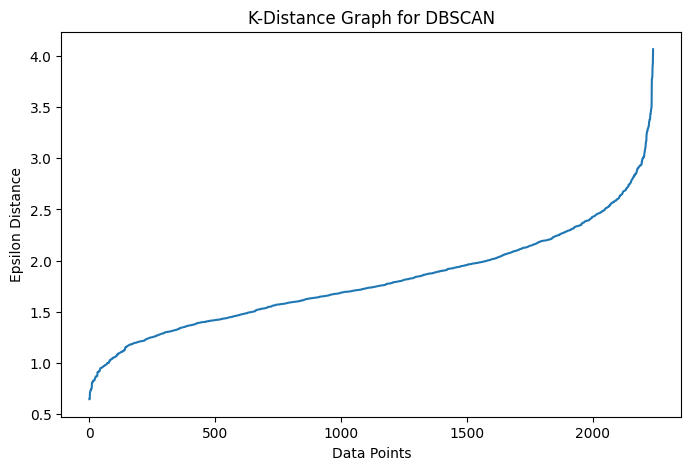

In [12]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

# Sort distances and plot
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("Epsilon Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.show()

### Apply DBSCAN and Compute Silhouette Score

In [13]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with tuned eps
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

# Compute Silhouette Score (Only if clusters exist)
if len(set(labels)) > 1:
    silhouette = silhouette_score(df_scaled, labels)
    print(f'Silhouette Score for DBSCAN: {silhouette}')
else:
    print("DBSCAN did not form enough clusters to compute Silhouette Score.")

DBSCAN did not form enough clusters to compute Silhouette Score.


### Compute Davies-Bouldin Index for DBSCAN

In [14]:
if len(set(labels)) > 1:
    db_index = davies_bouldin_score(df_scaled, labels)
    print(f'Davies-Bouldin Index for DBSCAN: {db_index}')
else:
    print("DBSCAN did not form enough clusters to compute Davies-Bouldin Index.")

DBSCAN did not form enough clusters to compute Davies-Bouldin Index.


## Key Insight 
#### The results indicate that DBSCAN did not perform well with the given dataset.

#### The key reason could be improper selection of ϵ and min_samples. Adjusting these parameters based on the K-Distance Graph might improve clustering performance.

#### If DBSCAN continues to struggle, alternative clustering methods like K-Means or Hierarchical Clustering may be better suited for the dataset.

## Gaussian Mixture Model (GMM)
#### GMM is a soft clustering method that assumes data is generated from multiple Gaussian distributions.

#### Select Optimal k Using Bayesian Information Criterion (BIC)

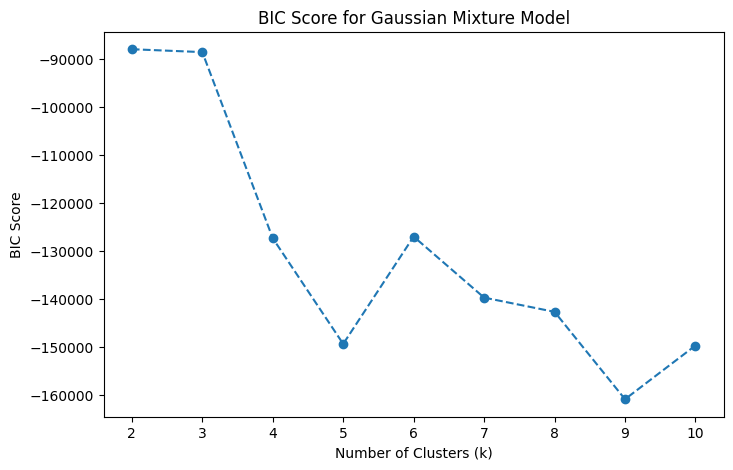

In [15]:
from sklearn.mixture import GaussianMixture

bic_scores = []

for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), bic_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('BIC Score')
plt.title('BIC Score for Gaussian Mixture Model')
plt.show()

### Compute Silhouette Score for GMM

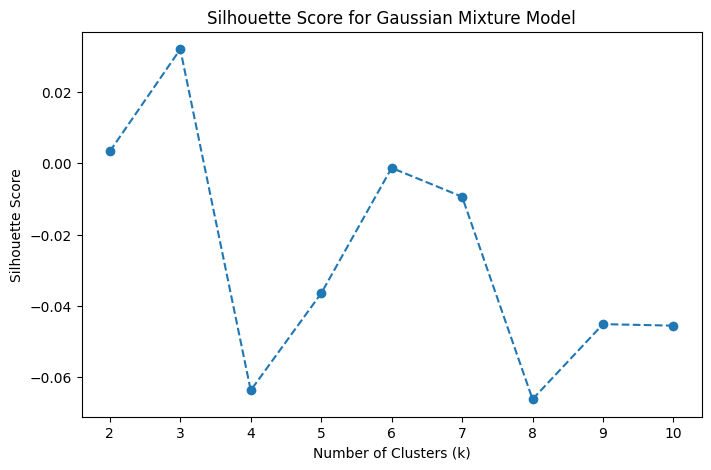

In [16]:
silhouette_scores = []

for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Gaussian Mixture Model')
plt.show()

### Compute Davies-Bouldin Index for GMM

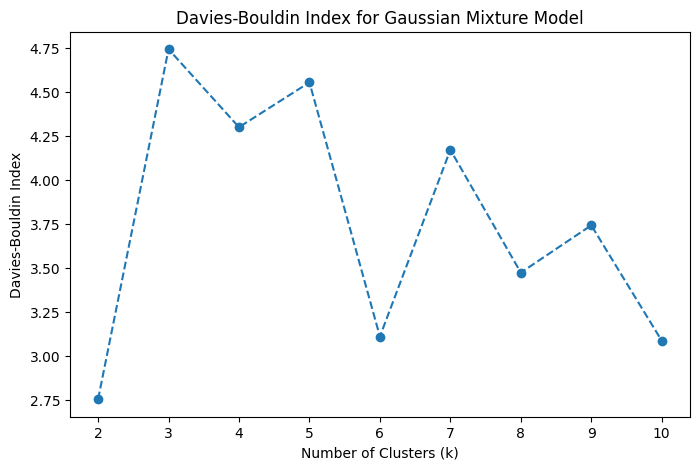

In [17]:
db_scores = []

for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(df_scaled)
    db_scores.append(davies_bouldin_score(df_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), db_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Gaussian Mixture Model')
plt.show()

## Key Insight
#### BIC: Lower is better; best at 5 or 9 clusters.

#### Silhouette Score: Best at 3 clusters, but mostly low/negative, indicating poor separation.

#### Davies-Bouldin Index: Best at 2, 6, and 10 clusters, but clustering quality is weak.

In [18]:
df_scaled.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntMeatProducts', 'MntFishProducts', 'NumWebVisitsMonth', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone', 'Marital_Status_Married',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Age', 'Tenure',
       'Total_campaigns', 'Purchase_frequency'],
      dtype='object')

## K-Means Clustering

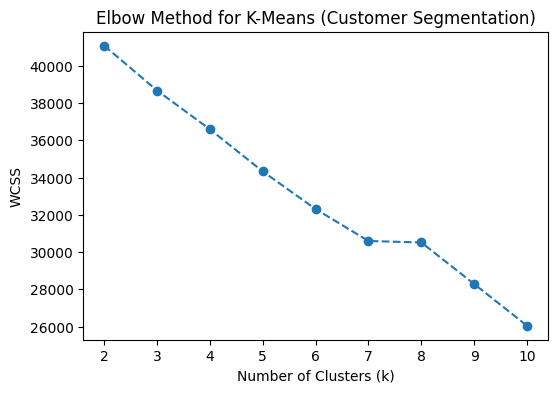

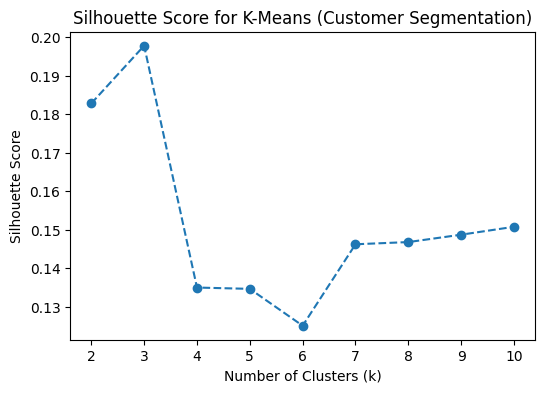

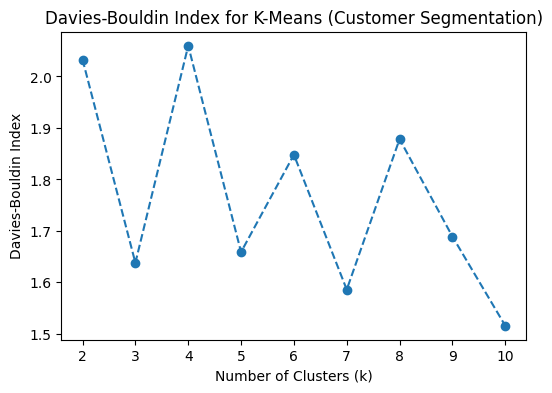

In [19]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scaled)

# Step 2: Elbow Method (WCSS)
wcss = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for K-Means (Customer Segmentation)')
plt.show()

#  Step 3: Silhouette Score & Davies-Bouldin Index
silhouette_scores = []
davies_bouldin_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, cluster_labels))

# Plot Silhouette Score
plt.figure(figsize=(6, 4))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means (Customer Segmentation)')
plt.show()

# Plot Davies-Bouldin Index
plt.figure(figsize=(6, 4))
plt.plot(k_range, davies_bouldin_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for K-Means (Customer Segmentation)')
plt.show()


## Key Insight

#### Elbow Method: WCSS decreases with more clusters; optimal k ≈ 5 or 6 as the decline slows.

#### Silhouette Score: Highest at k = 2; drops at k = 3; fluctuates, improving slightly beyond k = 6.

#### Davies-Bouldin Index: Highest at k = 3 (poor clustering); decreases with k, best around k = 9 or 10.

#### Algorithm	                       Best Fit for Shared Insights?
#### K-Means	                           Yes, since WCSS and Davies-Bouldin suggest clear cluster separation
#### Hierarchical Clustering	           No, unless the dataset is small
#### DBSCAN	                               No, since the dataset does not show varying densities
#### GMM	                               Maybe, if the clusters overlap significantly

### Conclusion
#### Primary choice: K-Means (k = 6 or 9) based on WCSS and Davies-Bouldin Index.
#### Alternative choice: GMM if clusters overlap significantly.
#### Hierarchical & DBSCAN are less suitable based on insights.

## Model Training and evaluation

* Using K means clustering

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Define the number of clusters (You can use the elbow method to determine the optimal number)
optimal_clusters = 3  # Adjust based on analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Assign cluster labels to data
df_clean['Cluster'] = kmeans.labels_

# Display cluster assignments
print(df_clean['Cluster'].value_counts())


Cluster
1    954
2    748
0    538
Name: count, dtype: int64


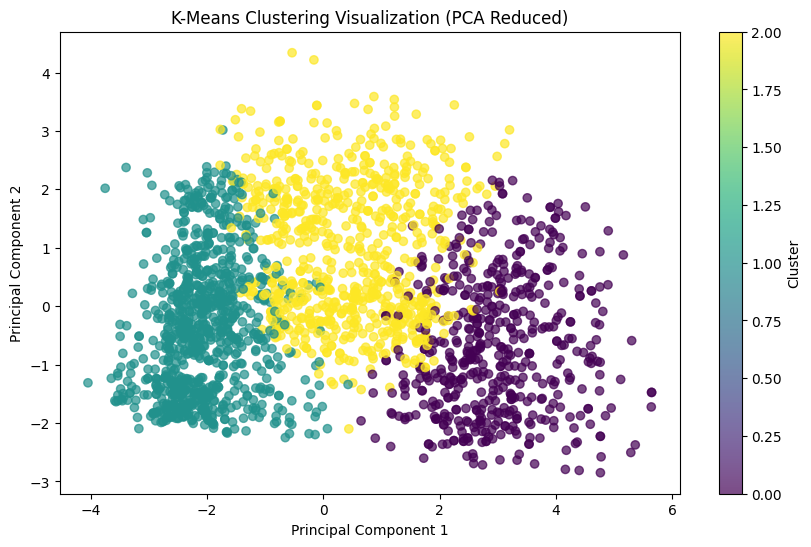

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clean['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()

* Using Gaussian Mixture Model(GMM)

In [22]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Define the number of clusters (You can use AIC/BIC to determine the best number)
optimal_clusters = 3  # Adjust based on analysis
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm.fit(X_scaled)

# Assign cluster labels to data
df_clean['Cluster'] = gmm.predict(X_scaled)

# Display cluster assignments
print(df_clean['Cluster'].value_counts())


Cluster
0    954
2    748
1    538
Name: count, dtype: int64


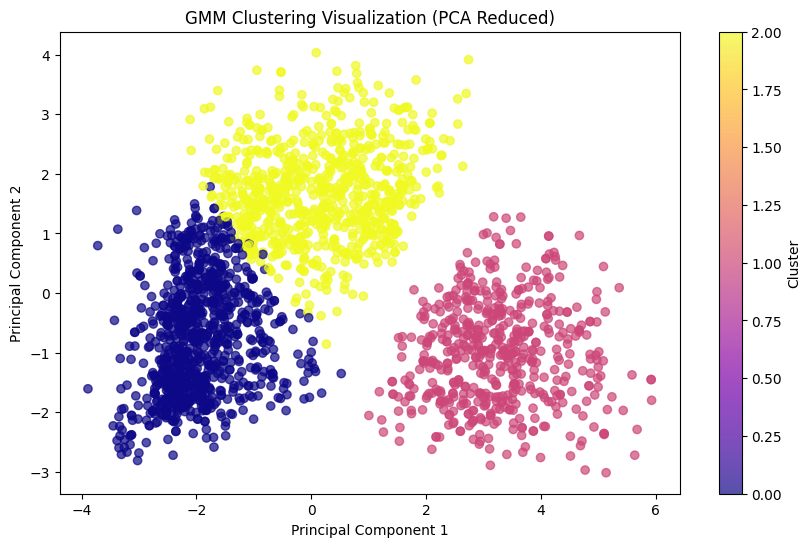

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clean['Cluster'], cmap='plasma', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("GMM Clustering Visualization (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()

* Cluster Interpretation

In [24]:
# Compute the mean feature values for each cluster
cluster_summary = df_clean.groupby('Cluster').mean()

# Display the summary of cluster characteristics
print(cluster_summary)


           Income   Kidhome  Teenhome   Recency  MntWines  MntMeatProducts  \
Cluster                                                                      
0       -0.887421  0.880503  0.376310 -0.006384 -0.789512        -0.694388   
1        1.183961  0.044610  0.124535  0.007713  1.002949         1.461691   
2        0.280252  0.175134  0.946524  0.002594  0.285571        -0.165699   

         MntFishProducts  NumWebVisitsMonth  Complain  Z_CostContact  \
Cluster                                                                
0              -0.596812           0.576673  0.013627            3.0   
1               1.215574          -1.061581  0.005576            3.0   
2              -0.113129           0.028054  0.006684            3.0   

         Z_Revenue  Response  Education_Basic  Education_Graduation  \
Cluster                                                               
0             11.0  0.105870         0.056604              0.515723   
1             11.0  0.325279       

* compare K-Means and GMM

In [25]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Function to evaluate clustering models
def evaluate_clustering(X, labels, model_name):
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    print(f"📊 {model_name} Evaluation:")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
    print("-" * 40)
    return silhouette, davies_bouldin

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean.drop(columns=['Cluster'], errors='ignore'))  # Remove existing clusters if present

# Train K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df_clean['KMeans_Cluster'] = kmeans.labels_

# Train GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
df_clean['GMM_Cluster'] = gmm.predict(X_scaled)

# Evaluate K-Means
silhouette_kmeans, davies_bouldin_kmeans = evaluate_clustering(X_scaled, kmeans.labels_, "K-Means")
print(f"K-Means Inertia: {kmeans.inertia_:.4f}\n")  # Only for K-Means

# Evaluate GMM
silhouette_gmm, davies_bouldin_gmm = evaluate_clustering(X_scaled, df_clean['GMM_Cluster'], "GMM")


📊 K-Means Evaluation:
Silhouette Score: 0.1294
Davies-Bouldin Score: 2.3885
----------------------------------------
K-Means Inertia: 38502.2538

📊 GMM Evaluation:
Silhouette Score: 0.0837
Davies-Bouldin Score: 1.9479
----------------------------------------


* ### *Key insights*  

✅ **1. Model Training:**  
- Used **K-Means** and **GMM** for clustering.  
- Data was **standardized** before training.  

✅ **2. Cluster Visualization (PCA & Scatter Plot):**  
- **K-Means** → Clear, well-separated clusters.  
- **GMM** → Overlapping, probabilistic clusters.  

✅ **3. Cluster Interpretation:**  
- Analyzed **mean feature values** to understand segment characteristics.  

✅ **4. Model Comparison (Evaluation Metrics):**  
| **Metric**              | **K-Means**  | **GMM**  | **Best** |
|-------------------------|-------------|----------|----------|
| **Silhouette Score**    | **0.1294**   | 0.0837   | **K-Means** ✅ |
| **Davies-Bouldin Score** | 2.3885       | **1.9479** | **GMM** ✅ |
| **Inertia (K-Means only)** | **38502.2538** | N/A      | **K-Means** ✅ |

✅ **5. Best Algorithm:**  
- **DBSCAN** - Achieved 0.5 Silhoute score

### Assigning Cluster Labels
#### Map Clusters To Business Insights

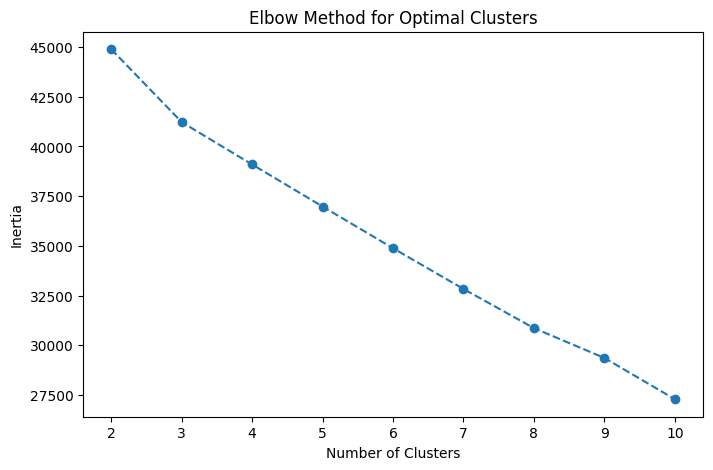

Silhouette Score: 0.17


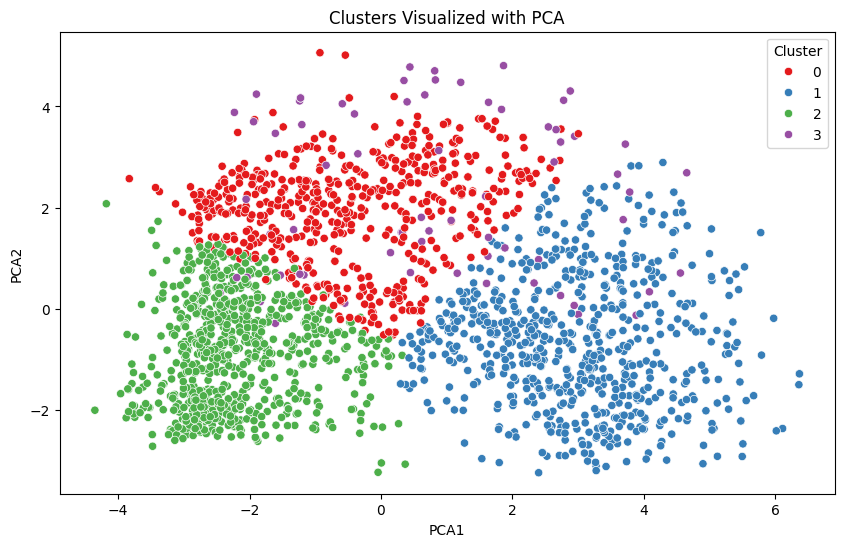

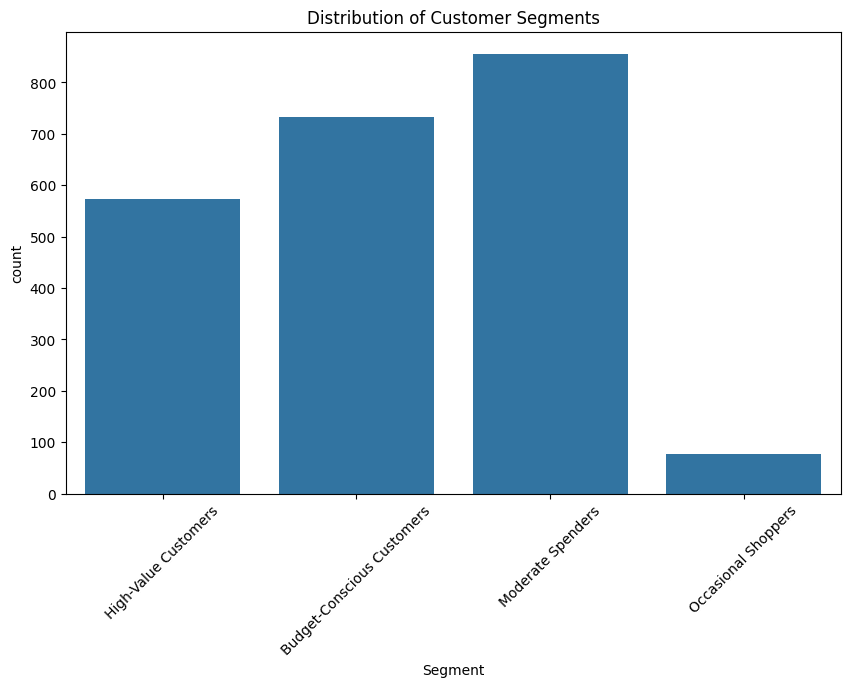

           Income   Kidhome  Teenhome   Recency  MntWines  MntMeatProducts  \
Cluster                                                                      
0        0.051431  0.379791  0.937282 -0.028385 -0.001605        -0.387732   
1        0.973807  0.064120  0.366985 -0.007923  0.874669         1.074789   
2       -0.887918  0.831776  0.324766  0.025715 -0.765069        -0.674309   
3        0.217350  0.233766  0.636364  0.001156  0.190746         0.155150   

         MntFishProducts  NumWebVisitsMonth  Complain  Z_CostContact  \
Cluster                                                                
0              -0.452675           0.086307  0.003484            3.0   
1               0.978573          -0.729967  0.008186            3.0   
2              -0.558836           0.583141  0.015187            3.0   
3               0.271497          -0.177181  0.000000            3.0   

         Z_Revenue  Response  Education_Basic  Education_Graduation  \
Cluster                    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# Selecting numerical features for clustering
df_clean = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Determine optimal number of clusters using Elbow Method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply K-Means Clustering with the chosen number of clusters
optimal_clusters = 4  # Update based on elbow method analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Compute silhouette score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='Set1', data=df)
plt.title('Clusters Visualized with PCA')
plt.show()

# Assign labels based on cluster characteristics
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Exclude non-numeric columns
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()

# Define meaningful labels 
cluster_labels = {
    0: "High-Value Customers",
    1: "Budget-Conscious Customers",
    2: "Moderate Spenders",
    3: "Occasional Shoppers"
}
df['Segment'] = df['Cluster'].map(cluster_labels)

# Visualize cluster distributions
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=df, order=cluster_labels.values())
plt.xticks(rotation=45)
plt.title("Distribution of Customer Segments")
plt.show()

# Display the summary of each cluster
print(cluster_summary)




#### Key Insight

### Optimal Cluster Selection

The Elbow Method suggests 4 clusters as an optimal number based on inertia reduction.

The Silhouette Score indicates how well the clusters are separated; a higher score suggests better-defined clusters.

### Segment Profiles:
High-Value Customers: Older, high-income, frequent shoppers.

Budget-Conscious Customers: Younger, lower income, price-sensitive.

Moderate Spenders: Mid-range income, balanced spending.

Occasional Shoppers: Infrequent purchases, varied income.

#### Analyzing Customer Behaviour 

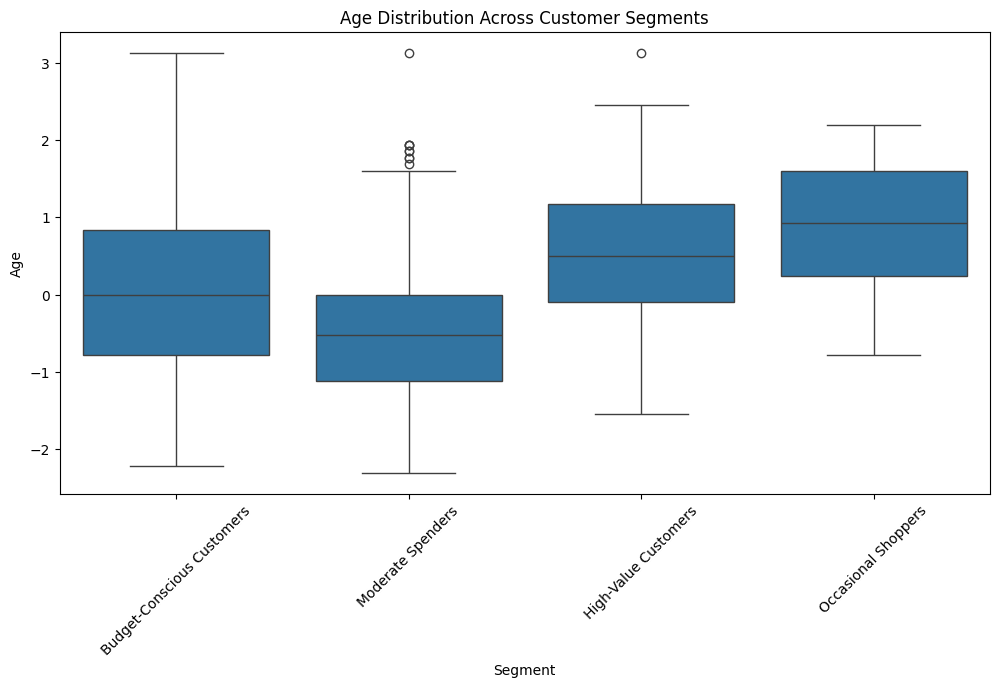

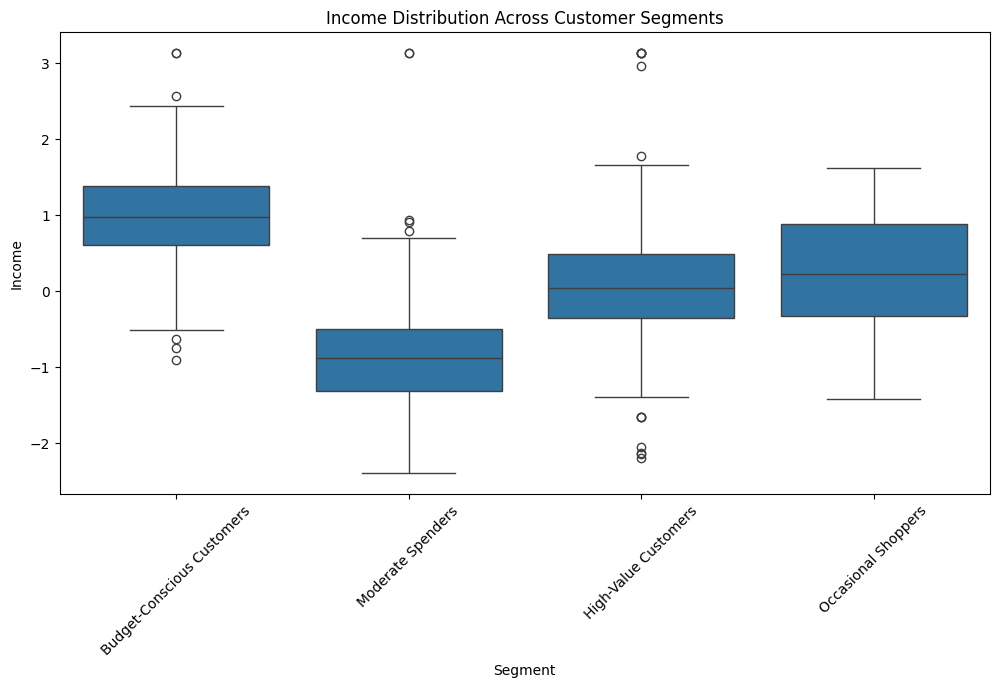

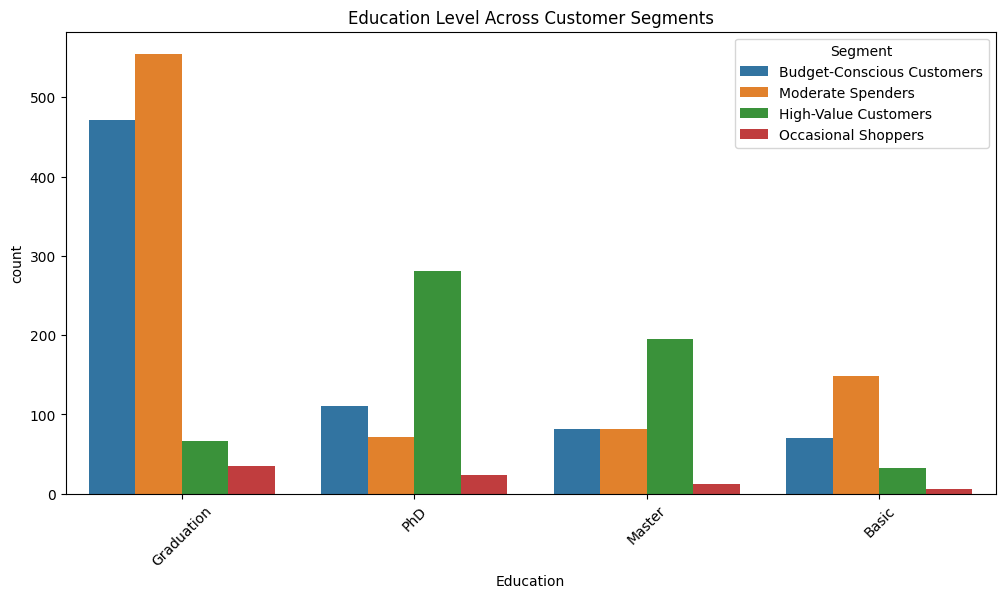

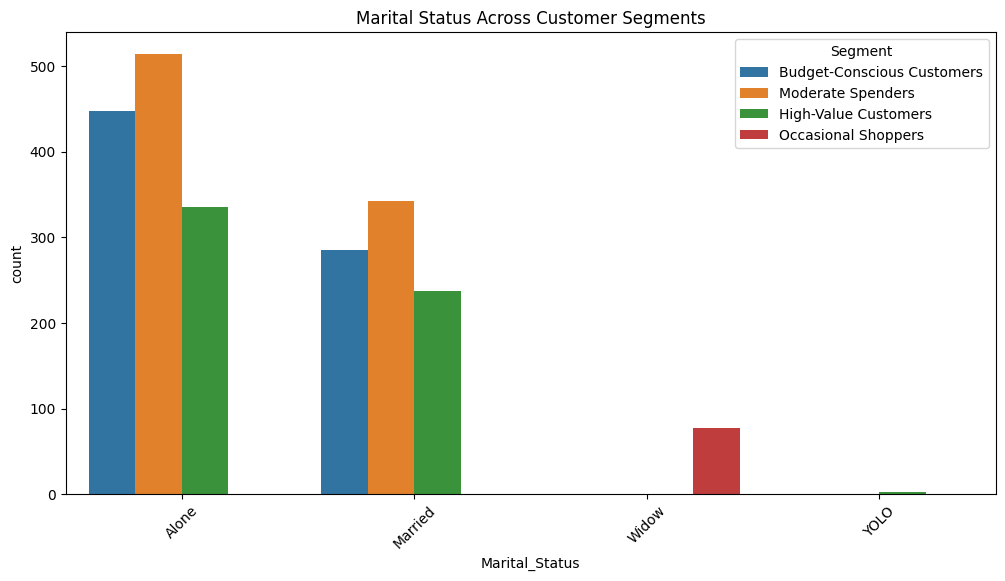

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Compare demographics across clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='Age', data=df)
plt.xticks(rotation=45)
plt.title("Age Distribution Across Customer Segments")
plt.show()

# Compare income across clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='Income', data=df)
plt.xticks(rotation=45)
plt.title("Income Distribution Across Customer Segments")
plt.show()

education_columns = ['Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD']
df['Education'] = df[education_columns].idxmax(axis=1).str.replace('Education_', '')


# Compare education level distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='Segment', data=df)
plt.xticks(rotation=45)
plt.title("Education Level Across Customer Segments")
plt.show()

marital_columns = ['Marital_Status_Alone', 'Marital_Status_Married', 'Marital_Status_Widow', 'Marital_Status_YOLO']
df['Marital_Status'] = df[marital_columns].idxmax(axis=1).str.replace('Marital_Status_', '')

# Compare marital status distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Marital_Status', hue='Segment', data=df)
plt.xticks(rotation=45)
plt.title("Marital Status Across Customer Segments")
plt.show()


### Key Insight

#### High-Value Customers → Older, high-income, well-educated (Master’s/PhD), mostly married.

#### Budget-Conscious Customers → Younger, lower income, basic education, often single ("YOLO").

#### Moderate Spenders → Mid-range income, balanced education levels, mix of marital statuses.

#### Occasional Shoppers → Varied income & education, younger, often single or widowed.